# Иванченко Максим, ИУ5-63Б, Вариант 6

In [29]:
import pandas as pd
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Смотрим на датасет

In [11]:
data = pd.read_csv("Admission_Predict.csv")
data.shape

(400, 9)

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
pd.concat({'Object type': data.dtypes, 'Null count': data.isnull().sum()}, axis=1)

,Object type,Null count
Serial No.,int64,0
GRE Score,int64,0
TOEFL Score,int64,0
University Rating,int64,0
SOP,float64,0
LOR,float64,0
CGPA,float64,0
Research,int64,0
Chance of Admit,float64,0


Удаляем стоблец с индексами внутри датасета

In [12]:
del data["Serial No."]

<Axes: >

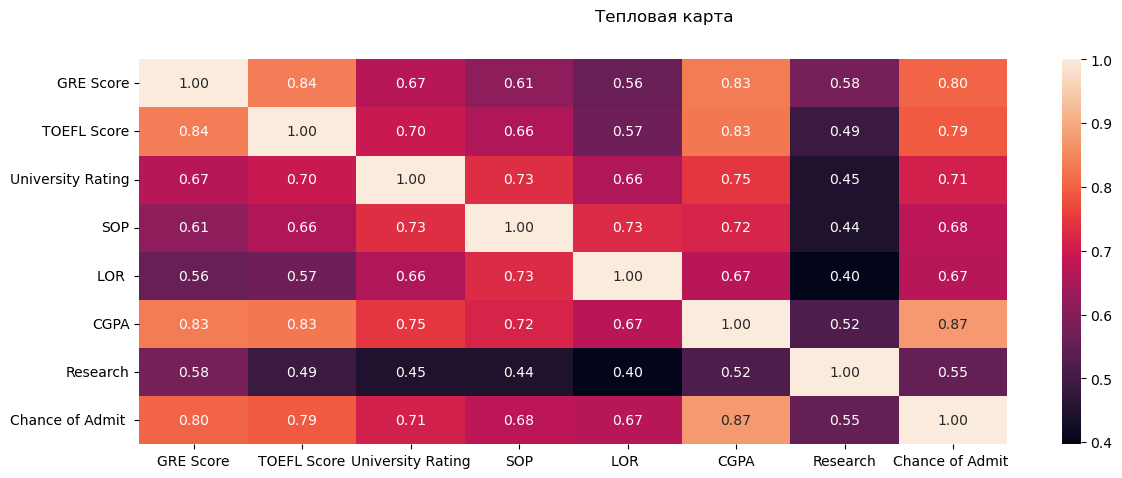

In [7]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(14,5))
fig.suptitle('Тепловая карта')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.2f')

In [16]:
target = data["Chance of Admit "]
data = data.drop(columns=["Chance of Admit "])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=18)

## Decision Tree

In [42]:
dec_tree = DecisionTreeRegressor(random_state=18)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=18)

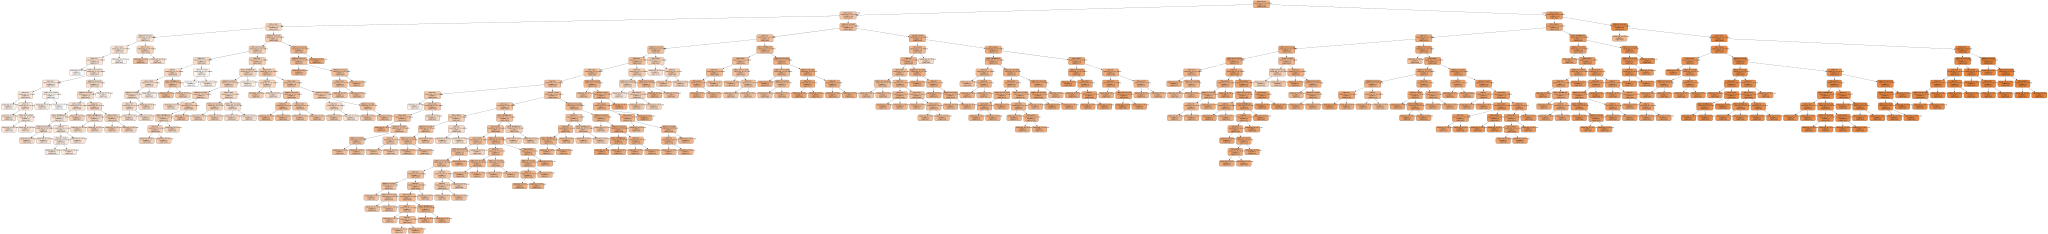

In [26]:
dot_data = export_graphviz(dec_tree, out_file=None, 
                           feature_names=data.columns,
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [43]:
predictions = dec_tree.predict(X_test)
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions)

(0.05325, 0.006472499999999997)

Подберем лучшие параметры

In [35]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.02, 0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [36]:
grid_abs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=18),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_abs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=18), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.02, 0.04, 0.06, 0.08]},
             scoring='neg_mean_absolute_error')

In [37]:
grid_sqr = GridSearchCV(estimator=DecisionTreeRegressor(random_state=18),
                    param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_sqr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=18), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.02, 0.04, 0.06, 0.08]},
             scoring='neg_mean_squared_error')

In [38]:
-grid_abs.best_score_, grid_abs.best_params_

(0.0510575697885813,
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.02})

In [39]:
-grid_sqr.best_score_, grid_sqr.best_params_

(0.004837479846292863,
 {'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 0.04})

## Random Forest

In [60]:
rf_model = RandomForestRegressor(n_estimators=50, criterion='absolute_error', oob_score=True, random_state=18)
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=50,
                      oob_score=True, random_state=18)

In [61]:
predictions_1 = rf_model.predict(X_test)
mean_absolute_error(y_test, predictions_1), mean_squared_error(y_test, predictions_1)

(0.05486999999999999, 0.006020331249999998)

In [64]:
params = {
    'n_estimators': [5, 10, 20, 50, 100],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.02, 0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [65]:
grid_abs_1 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=18),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_abs_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=18),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.02, 0.04, 0.06, 0.08],
                         'n_estimators': [5, 10, 20, 50, 100]},
             scoring='neg_mean_absolute_error')

In [66]:
grid_sqr_1 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=18),
                    param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_sqr_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=18),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.02, 0.04, 0.06, 0.08],
                         'n_estimators': [5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [67]:
-grid_abs_1.best_score_, grid_abs_1.best_params_ # лучшее предсказание для датасета

(0.047295356260501464,
 {'max_depth': 6,
  'max_features': 0.6,
  'min_samples_leaf': 0.02,
  'n_estimators': 20})

In [68]:
-grid_sqr.best_score_, grid_sqr.best_params_

(0.004837479846292863,
 {'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 0.04})

Результаты оказались +- одинаковыми для Decision Tree и Random Forest, но в ходе подбора гиперпараметров\
Random Forest показал лучший результат задачи регрессии.